# **CNVbot Runner**

Download the coverage bed file for chr21, the reference images, the chr to coverage mapping, the ecoder and the decoder.

In [ ]:
!mkdir -p cnvbot_data
%cd cnvbot_data

!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr1.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr2.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr3.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr4.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr5.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr6.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr7.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr8.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr9.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr10.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr11.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr12.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr13.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr14.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr15.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr16.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr17.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr18.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr19.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr20.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr21.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr22.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chrX.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chrY.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chrM.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/models/cnvbot_encoder.h5
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/models/cnvbot_decoder.h5
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/chr_coverage.tsv

In [1]:
!mkdir -p cnvbot_data
%cd cnvbot_data
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr22.txt.gz
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr15.txt.gz
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr19.txt.gz
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr21.txt.gz
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr16.txt.gz
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr10.txt.gz

!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr11.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr12.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr13.txt.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr14.txt.gz

!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/models/cnvbot_encoder.h5
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/models/cnvbot_decoder.h5
#!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/references.tar.gz
!wget https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/chr_coverage.tsv

/content/cnvbot_data
--2021-07-18 07:56:14--  https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr11.txt.gz
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 399630078 (381M) [application/x-gzip]
Saving to: ‘coverage.chr11.txt.gz’

coverage.chr11.txt. 100%[===================>] 381.12M   124MB/s    in 3.7s    

2021-07-18 07:56:24 (104 MB/s) - ‘coverage.chr11.txt.gz’ saved [399630078/399630078]

--2021-07-18 07:56:24--  https://gitlab.com/jazberna/cnvbot/-/raw/main/dataset/coverage.chr12.txt.gz
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394588275 (376M) [application/x-gzip]
Saving to: ‘coverage.chr12.txt.gz’

coverage.chr12.txt. 100%[===========

In [ ]:
!tar -xvzf references.tar.gz

In [ ]:
!ls

chr_coverage.tsv     cnvbot_encoder.h5	      references.tar.gz
chr_coverage.tsv.1   cnvbot_encoder.h5.1      references.tar.gz.1
cnvbot_decoder.h5    coverage.chr10.txt.gz
cnvbot_decoder.h5.1  coverage.chr10.txt.gz.1


load libraries

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import keras
from keras import layers
from keras.initializers import RandomNormal
from PIL import Image
import numpy as np
from numpy import asarray, max, min, copy
import glob
from numpy import empty, savez_compressed, load
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML
import pandas as pd
import plotly.graph_objects as go
from collections import defaultdict
import warnings
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import scipy.misc
import matplotlib.pyplot as plt
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import add
from keras.layers import Reshape
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.optimizers import Adam
from tensorflow.keras import layers
import keras
import PIL
import warnings
import re
import matplotlib.patches as patches
import scipy.ndimage as ndimage
from skimage import exposure
from skimage.exposure import match_histograms
import pickle
from copy import deepcopy
from scipy import stats
from scipy.stats import norm, wilcoxon
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.multitest import fdrcorrection, multipletests
from keras.regularizers import l2, l1, l1_l2
import csv
from keras.models import load_model
from scipy import spatial
import gzip
import random

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
def chr2coverage(chr2coverage_file):
  chr2cov = {}

  f = open(chr2coverage_file, 'r')
  for l in f:
    l = l.rstrip().split('\t')
    chr2cov[ l[0] ]=float(l[1])
  
  return chr2cov

normalizes from 0 to 1

In [4]:
def normalize(X):
    X = X.astype('float32')
    X = (X / 255)
    # scale from [0,1]
    return X

takes a one channel image and a side size (i.e. 100) and returns the corresponding resize side_sizexsize_sizex1 (100x100x1)

In [ ]:
# cambiar esto para que la intesidad de pixel sea inversa -hecho: image = (image * -1) +1  -
#def image2array(image,image_size):
#  image = Image.open(image)
#  image.resize((image_size,image_size))
#  image = np.asarray(image)
#  image = (image * -1) +1 
#  image = image.reshape((image_size,image_size,1))
#  return image

In [5]:
def image2array(image,image_size):
  image = Image.open(image)
  image.resize((image_size,image_size))
  image = np.asarray(image)
  image = image.reshape((image_size,image_size,1))
  return image

Some global variables for this example

In [6]:
def process_reference_files(chr,encoder,image_size_size):
  cn0,cn1,cn2,cn3,cn4=list(map(lambda png: image2array(png,image_size_size), [chr+'_cn0.png',chr+'_cn1.png',chr+'_cn2.png',chr+'_cn3.png',chr+'_cn4.png']))

  cn0_embedding = encoder.predict(cn0.reshape(1,image_size_size,image_size_size,1))
  cn1_embedding = encoder.predict(cn1.reshape(1,image_size_size,image_size_size,1))
  cn2_embedding = encoder.predict(cn2.reshape(1,image_size_size,image_size_size,1))
  cn3_embedding = encoder.predict(cn3.reshape(1,image_size_size,image_size_size,1))
  cn4_embedding = encoder.predict(cn4.reshape(1,image_size_size,image_size_size,1))  


  return (cn0_embedding,cn1_embedding,cn2_embedding,cn3_embedding,cn4_embedding)


In [7]:
def decode_references(cn0_embedding,cn1_embedding,cn2_embedding,cn3_embedding,cn4_embedding,decoder,image_size_size):
 
  dec0=decoder.predict(cn0_embedding).reshape(image_size_size,image_size_size)
  dec1=decoder.predict(cn1_embedding).reshape(image_size_size,image_size_size)
  dec2=decoder.predict(cn2_embedding).reshape(image_size_size,image_size_size)
  dec3=decoder.predict(cn3_embedding).reshape(image_size_size,image_size_size)
  dec4=decoder.predict(cn4_embedding).reshape(image_size_size,image_size_size)

  return (dec0,dec1,dec2,dec3,dec4)

In [8]:
def process_batch_of_images(encoder,batch, out_handle, start, x_max , cn0_references_embeddings, cn1_references_embeddings,cn2_references_embeddings, cn3_references_embeddings, cn4_references_embeddings):
  embeddings = encoder.predict(np.asarray(batch))
  estimations=list()
  for embedding in embeddings:
    dot_cn0 = np.mean(list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0]) ,cn0_references_embeddings )))
    dot_cn1 = np.mean(list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0]) ,cn1_references_embeddings )))
    dot_cn2 = np.mean(list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0]) ,cn2_references_embeddings )))
    dot_cn3 = np.mean(list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0]) ,cn3_references_embeddings )))
    dot_cn4 = np.mean(list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0]) ,cn4_references_embeddings )))
    all_dot=[dot_cn0,dot_cn1,dot_cn2,dot_cn3,dot_cn4]
    estimated_cn_dot = all_dot.index(max(all_dot)) 
        #distances = list(map( lambda cn_embedding: np.linalg.norm(embedding - cn_embedding[0]), [ cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding]))
        #print('***********')
        #print(embedding.shape)
        #print(cn0_embedding[0].shape)
        #print('***********')
        #similarities = list(map( lambda cn_embedding: spatial.distance.cosine( embedding, cn_embedding[0] ), [ cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding]))
        #
        #dot =  list(map( lambda cn_embedding: np.dot( embedding, cn_embedding[0] ), [ cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding]))
        #
        #estimated_cn = distances.index(min(distances))
        #estimated_cn_sim = similarities.index(min(similarities))
        #estimated_cn_dot = dot.index(max(dot))
        
    end = start + x_max
    #print("{}\t{}\t{}\t{}".format(chr,start,end,estimated_cn))
    f.write("{}\t{}\t{}\t{}\n".format(chr,start,end,estimated_cn_dot))
    estimations.append([chr,start,end,estimated_cn_dot,all_dot])
        #estimations.append([chr,start,end,estimated_cn,distances])
    start = end
  return estimations

In [9]:
def make_image_from_coverage(reader,x_max,y_max):
  #global counter
  
  chunk_start=None
  chunk=np.zeros((x_max,y_max,1))
  for i in range(0,x_max):
    _,coordinate,coverage = next(reader)
    if chunk_start is None:
       chunk_start = int(coordinate)

    #counter+=1
    #print(counter)
    for j in range(0,int(coverage)):
      if j >= y_max - 1:
        j = y_max - 1
      chunk[i,j]=1
  chunk = chunk.reshape((x_max,y_max))
  image = Image.fromarray(chunk.astype('uint8')*255)
  image = image.resize((x_max,x_max))
  image = image.transpose(Image.ROTATE_90)
  image = np.asarray(image)
  image = image.reshape((x_max,x_max,1))
  image = normalize(image)
  return image, chunk_start

In [10]:
def make_reference_image_from_coverage(coverage,x_max,sd=0):
  #global counter
  
  chunk_start=None
  chunk=np.zeros((x_max,x_max,1))
  for i in range(0,x_max):
    coverage += random.normalvariate(0, sd)
    for j in range(0,int(coverage)):
      if j >= x_max:
        j = x_max -1
      #val = 1 + abs (random.normalvariate(1, 3))
      #print(val)
      chunk[i,j]=1
  chunk = chunk.reshape((x_max,x_max))
  image = Image.fromarray(chunk.astype('uint8')*255)
  image = image.resize((x_max,x_max))
  image = image.transpose(Image.ROTATE_90)
  image = np.asarray(image)
  image = image.reshape((x_max,x_max,1))
  image = normalize(image)
  return image

In [ ]:
!head -n93000 coverage.chr21.txt > coverage.chr21.partial.txt
!wc -l coverage.chr21.txt

In [11]:
def get_y_max(chr2cov):
  y_max=0
  for chr,coverage in chr2cov.items():
    if (coverage >= y_max) and (chr != 'chrM'):
      y_max = coverage
  return int(y_max) * 2 

In [13]:
def get_y_average(chr2cov):
  y_total=0
  n_chrs=0
  for chr,coverage in chr2cov.items():
    if chr not in ['chrM', 'chrY', 'chrM']:
      y_total+= coverage
      n_chrs+=1
  
  return int(y_total/n_chrs) * 2

['chr11', 1, 101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


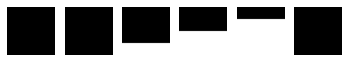

*********************
['chr11', 3000001, 3000101, 3, [-41957.035, -39259.12, 20902.04, 132116.17, 57845.152]]
0.7646714 0.0 0.25 0.5 0.75 1.0


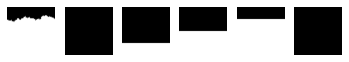

*********************
['chr11', 6000001, 6000101, 3, [-2279.15, 12831.134, 103234.875, 103483.63, 6201.4116]]
0.64909095 0.0 0.25 0.5 0.75 1.0


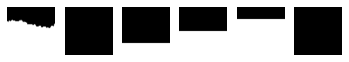

*********************
['chr11', 9000001, 9000101, 2, [32067.602, 64066.15, 152483.08, 74852.06, -24183.186]]
0.5798204 0.0 0.25 0.5 0.75 1.0


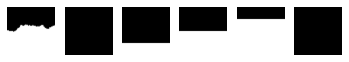

*********************
['chr11', 12000001, 12000101, 2, [44165.54, 98109.18, 174658.81, 37715.66, -39672.855]]
0.51604277 0.0 0.25 0.5 0.75 1.0


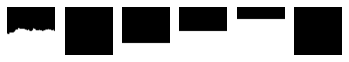

*********************
['chr11', 15000001, 15000101, 2, [44279.027, 98718.92, 175364.95, 35141.082, -41311.65]]
0.5157604 0.0 0.25 0.5 0.75 1.0


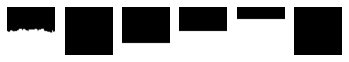

*********************
['chr11', 18000001, 18000101, 1, [75884.57, 182100.39, 153910.7, -13631.383, -71739.27]]
0.35856625 0.0 0.25 0.5 0.75 1.0


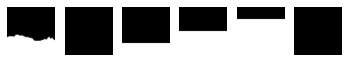

*********************
['chr11', 21000001, 21000101, 2, [40205.86, 92134.63, 171394.28, 40780.32, -40414.367]]
0.52526236 0.0 0.25 0.5 0.75 1.0


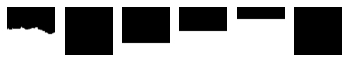

*********************
['chr11', 24000001, 24000101, 2, [51948.68, 134717.97, 169499.16, 14720.098, -51249.797]]
0.4520459 0.0 0.25 0.5 0.75 1.0


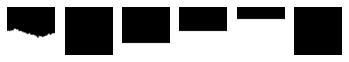

*********************
['chr11', 27000001, 27000101, 1, [71627.8, 176075.61, 158018.3, -12268.559, -67667.16]]
0.3687537 0.0 0.25 0.5 0.75 1.0


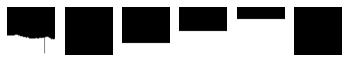

*********************
['chr11', 30000001, 30000101, 2, [50810.645, 129564.93, 173124.06, 17569.418, -49839.016]]
0.4641541 0.0 0.25 0.5 0.75 1.0


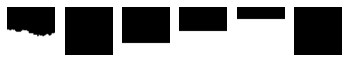

*********************
['chr11', 33000001, 33000101, 2, [31044.262, 59461.71, 148316.38, 74875.59, -27113.016]]
0.58525294 0.0 0.25 0.5 0.75 1.0


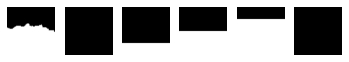

*********************
['chr11', 36000001, 36000101, 3, [3614.9087, 17078.229, 96202.46, 108933.695, 202.26355]]
0.66043806 0.0 0.25 0.5 0.75 1.0


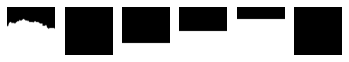

*********************
['chr11', 39000001, 39000101, 2, [32813.445, 74348.41, 161032.42, 58628.426, -32253.375]]
0.55593294 0.0 0.25 0.5 0.75 1.0


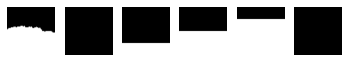

*********************
['chr11', 42000001, 42000101, 2, [51732.605, 127390.3, 178460.8, 16572.656, -46466.992]]
0.46878234 0.0 0.25 0.5 0.75 1.0


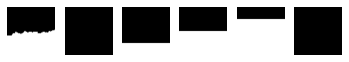

*********************
['chr11', 45000001, 45000101, 2, [57364.137, 147795.27, 172039.81, 6783.616, -53270.96]]
0.43283135 0.0 0.25 0.5 0.75 1.0


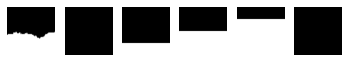

*********************
['chr11', 48000001, 48000101, 2, [30017.06, 55789.17, 144745.33, 83796.04, -23293.932]]
0.5946188 0.0 0.25 0.5 0.75 1.0


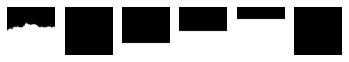

*********************
['chr11', 51000001, 51000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


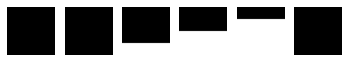

*********************
['chr11', 54000001, 54000101, 1, [152105.64, 163909.9, 74504.44, -28377.834, -142207.53]]
0.10476234 0.0 0.25 0.5 0.75 1.0


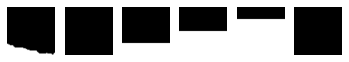

*********************
['chr11', 57000001, 57000101, 1, [68874.56, 173002.05, 164909.78, -9871.078, -62039.89]]
0.38278195 0.0 0.25 0.5 0.75 1.0


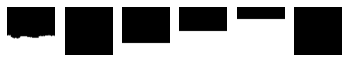

*********************
['chr11', 60000001, 60000101, 2, [53604.902, 142502.61, 177259.27, 5133.243, -51396.027]]
0.4399416 0.0 0.25 0.5 0.75 1.0


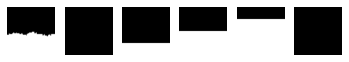

*********************
['chr11', 63000001, 63000101, 2, [56380.863, 146681.69, 175317.62, 1519.355, -54079.63]]
0.43345878 0.0 0.25 0.5 0.75 1.0


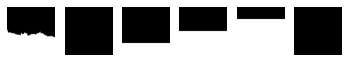

*********************
['chr11', 66000001, 66000101, 3, [5486.682, 11021.392, 94450.31, 117349.89, 7021.5874]]
0.66654235 0.0 0.25 0.5 0.75 1.0


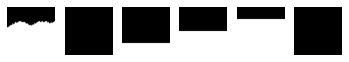

*********************
['chr11', 69000001, 69000101, 2, [33637.18, 72864.14, 158532.14, 54137.65, -31606.15]]
0.5536722 0.0 0.25 0.5 0.75 1.0


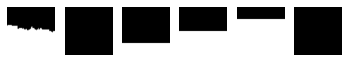

*********************
['chr11', 72000001, 72000101, 2, [56552.207, 141631.4, 177555.17, 4161.623, -52706.07]]
0.44286788 0.0 0.25 0.5 0.75 1.0


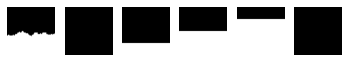

*********************
['chr11', 75000001, 75000101, 1, [100457.27, 199502.0, 129859.055, -28046.566, -90570.5]]
0.30111098 0.0 0.25 0.5 0.75 1.0


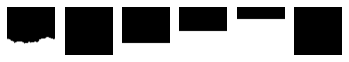

*********************
['chr11', 78000001, 78000101, 2, [51249.664, 112246.67, 175291.92, 25944.402, -44482.105]]
0.4944831 0.0 0.25 0.5 0.75 1.0


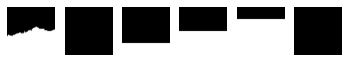

*********************
['chr11', 81000001, 81000101, 1, [68595.82, 169921.23, 165310.36, -8989.159, -60694.19]]
0.3879608 0.0 0.25 0.5 0.75 1.0


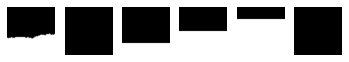

*********************
['chr11', 84000001, 84000101, 2, [52398.81, 137279.3, 175695.05, 8599.726, -52070.15]]
0.4485753 0.0 0.25 0.5 0.75 1.0


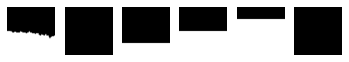

*********************
['chr11', 87000001, 87000101, 2, [45983.26, 116945.96, 173904.75, 22988.39, -46001.6]]
0.48335096 0.0 0.25 0.5 0.75 1.0


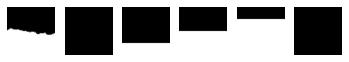

*********************
['chr11', 90000001, 90000101, 2, [35155.555, 71978.91, 160936.34, 58663.977, -32249.643]]
0.5590247 0.0 0.25 0.5 0.75 1.0


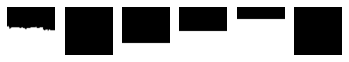

*********************
['chr11', 93000001, 93000101, 2, [42731.55, 93957.47, 165670.72, 41415.996, -36222.074]]
0.52267766 0.0 0.25 0.5 0.75 1.0


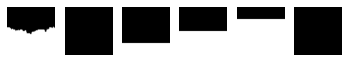

*********************
['chr11', 96000001, 96000101, 2, [51270.996, 129155.81, 174147.0, 16006.145, -47851.84]]
0.46550116 0.0 0.25 0.5 0.75 1.0


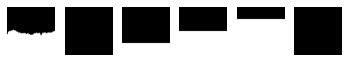

*********************
['chr11', 99000001, 99000101, 2, [65540.49, 160902.27, 161901.11, -5068.924, -66118.0]]
0.3951188 0.0 0.25 0.5 0.75 1.0


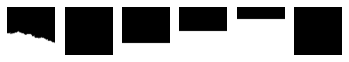

*********************
['chr11', 102000001, 102000101, 2, [40495.637, 90973.34, 164421.83, 40087.004, -37536.586]]
0.5253612 0.0 0.25 0.5 0.75 1.0


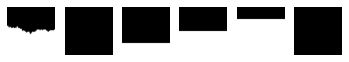

*********************
['chr11', 105000001, 105000101, 2, [34560.016, 60549.68, 151047.64, 68142.1, -27510.848]]
0.5754631 0.0 0.25 0.5 0.75 1.0


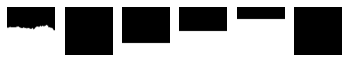

*********************
['chr11', 108000001, 108000101, 2, [50808.3, 126206.24, 177028.53, 15176.716, -46598.195]]
0.4706831 0.0 0.25 0.5 0.75 1.0


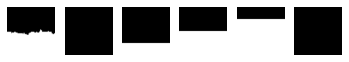

*********************
['chr11', 111000001, 111000101, 2, [45449.33, 102977.73, 147573.56, 40278.33, -38804.766]]
0.5218475 0.0 0.25 0.5 0.75 1.0


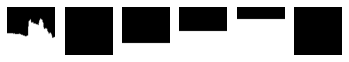

*********************
['chr11', 114000001, 114000101, 2, [18623.688, 40488.55, 127118.63, 95556.68, -13083.343]]
0.6205384 0.0 0.25 0.5 0.75 1.0


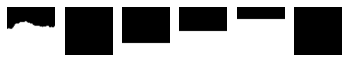

*********************
['chr11', 117000001, 117000101, 2, [31691.94, 74577.086, 158321.2, 52923.35, -32339.748]]
0.55056477 0.0 0.25 0.5 0.75 1.0


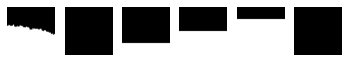

*********************
['chr11', 120000001, 120000101, 2, [56154.957, 140424.94, 178172.88, 4576.1504, -52534.754]]
0.44442236 0.0 0.25 0.5 0.75 1.0


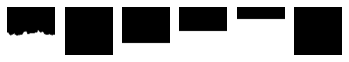

*********************
['chr11', 123000001, 123000101, 2, [14519.3125, 35367.836, 121517.13, 96183.234, -11291.09]]
0.6270059 0.0 0.25 0.5 0.75 1.0


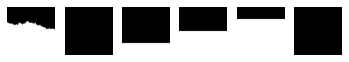

*********************
['chr11', 126000001, 126000101, 2, [48950.203, 121205.43, 170621.03, 22344.854, -47380.3]]
0.4766702 0.0 0.25 0.5 0.75 1.0


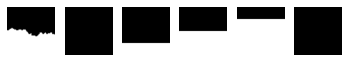

*********************
['chr11', 129000001, 129000101, 2, [55493.91, 137719.61, 162171.05, 10747.544, -57884.395]]
0.44001254 0.0 0.25 0.5 0.75 1.0


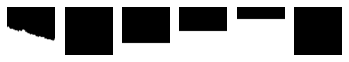

*********************
['chr11', 132000001, 132000101, 3, [5777.5483, 15265.407, 90501.48, 120745.13, 5446.3755]]
0.6749859 0.0 0.25 0.5 0.75 1.0


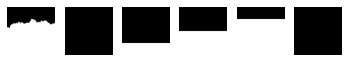

*********************
['chr11', 135000001, 135000101, 2, [43941.508, 109448.33, 171560.33, 28614.064, -43496.83]]
0.49503258 0.0 0.25 0.5 0.75 1.0
cns.chr11.txt is done
['chr12', 1, 101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


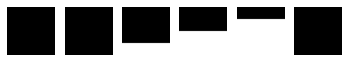

*********************
['chr12', 3000001, 3000101, 3, [-35058.348, -27602.742, 30584.047, 132045.25, 49686.12]]
0.7498169 0.0 0.25 0.5 0.75 1.0


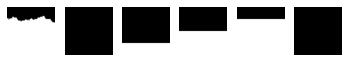

*********************
['chr12', 6000001, 6000101, 2, [33693.367, 71562.21, 160398.47, 63974.844, -27352.396]]
0.5599471 0.0 0.25 0.5 0.75 1.0


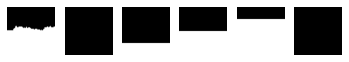

*********************
['chr12', 9000001, 9000101, 2, [67761.12, 152661.31, 162216.75, 2177.9429, -55541.39]]
0.41564474 0.0 0.25 0.5 0.75 1.0


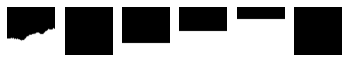

*********************
['chr12', 12000001, 12000101, 2, [28341.592, 57837.28, 147830.08, 81643.195, -22588.46]]
0.5903745 0.0 0.25 0.5 0.75 1.0


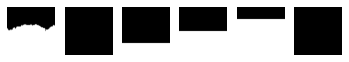

*********************
['chr12', 15000001, 15000101, 2, [35157.2, 68012.516, 148510.4, 62980.176, -22671.018]]
0.56219417 0.0 0.25 0.5 0.75 1.0


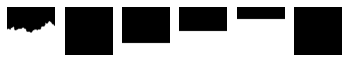

*********************
['chr12', 18000001, 18000101, 1, [77490.555, 183525.48, 155828.27, -15852.687, -70762.195]]
0.35883096 0.0 0.25 0.5 0.75 1.0


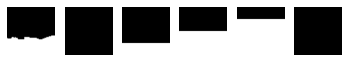

*********************
['chr12', 21000001, 21000101, 2, [61733.465, 154481.34, 173781.92, -3966.3672, -56393.39]]
0.41573414 0.0 0.25 0.5 0.75 1.0


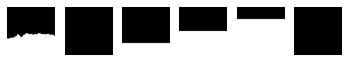

*********************
['chr12', 24000001, 24000101, 3, [3416.0771, 8439.748, 90060.195, 119705.09, 8682.426]]
0.6724702 0.0 0.25 0.5 0.75 1.0


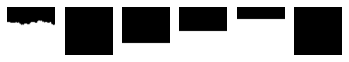

*********************
['chr12', 27000001, 27000101, 2, [27778.098, 53029.742, 145119.98, 77486.836, -22996.988]]
0.5917431 0.0 0.25 0.5 0.75 1.0


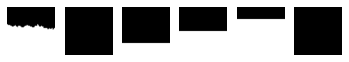

*********************
['chr12', 30000001, 30000101, 2, [40198.324, 88647.17, 171730.95, 48409.844, -35874.875]]
0.5341185 0.0 0.25 0.5 0.75 1.0


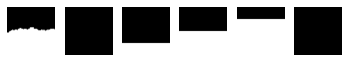

*********************
['chr12', 33000001, 33000101, 2, [53097.613, 136603.2, 180090.8, 10351.872, -51885.234]]
0.45094037 0.0 0.25 0.5 0.75 1.0


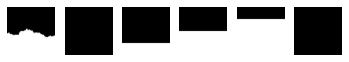

*********************
['chr12', 36000001, 36000101, 4, [-156950.36, -104469.445, -37067.5, 72639.46, 165189.2]]
0.9552992 0.0 0.25 0.5 0.75 1.0


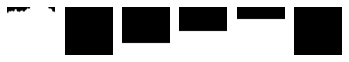

*********************
['chr12', 39000001, 39000101, 2, [24048.264, 41271.918, 132017.3, 95550.94, -13383.541]]
0.61547375 0.0 0.25 0.5 0.75 1.0


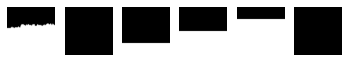

*********************
['chr12', 42000001, 42000101, 2, [46933.242, 100328.07, 167675.38, 36293.188, -37999.24]]
0.5111882 0.0 0.25 0.5 0.75 1.0


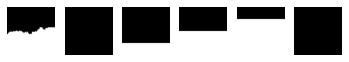

*********************
['chr12', 45000001, 45000101, 2, [53506.055, 119232.07, 175612.17, 20760.244, -44976.91]]
0.4811149 0.0 0.25 0.5 0.75 1.0


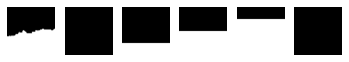

*********************
['chr12', 48000001, 48000101, 2, [51135.27, 133731.28, 177823.31, 13498.159, -47614.797]]
0.45882705 0.0 0.25 0.5 0.75 1.0


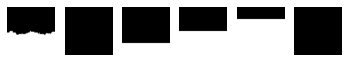

*********************
['chr12', 51000001, 51000101, 2, [25685.742, 73016.5, 155457.39, 59525.797, -26272.555]]
0.5552835 0.0 0.25 0.5 0.75 1.0


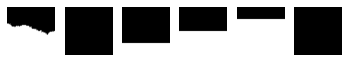

*********************
['chr12', 54000001, 54000101, 3, [-4460.1084, 4961.7217, 93859.2, 106350.31, 10028.784]]
0.66000235 0.0 0.25 0.5 0.75 1.0


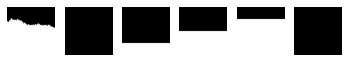

*********************
['chr12', 57000001, 57000101, 2, [43826.086, 110500.38, 170435.08, 27703.902, -42414.086]]
0.49306196 0.0 0.25 0.5 0.75 1.0


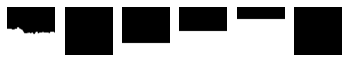

*********************
['chr12', 60000001, 60000101, 1, [69598.72, 174010.12, 162397.16, -11931.026, -66558.87]]
0.3791396 0.0 0.25 0.5 0.75 1.0


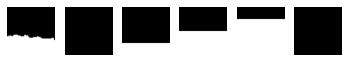

*********************
['chr12', 63000001, 63000101, 2, [45895.96, 104957.44, 172446.4, 33263.953, -40406.266]]
0.50702 0.0 0.25 0.5 0.75 1.0


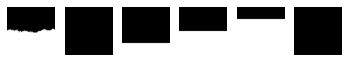

*********************
['chr12', 66000001, 66000101, 3, [2635.6165, 6190.7935, 94749.82, 114300.58, 8992.986]]
0.6634494 0.0 0.25 0.5 0.75 1.0


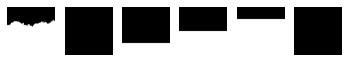

*********************
['chr12', 69000001, 69000101, 2, [54766.152, 134758.81, 176637.16, 9938.941, -49190.02]]
0.4569039 0.0 0.25 0.5 0.75 1.0


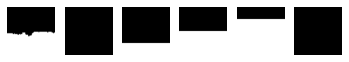

*********************
['chr12', 72000001, 72000101, 2, [37745.41, 88002.305, 158683.23, 48284.258, -31358.44]]
0.5291392 0.0 0.25 0.5 0.75 1.0


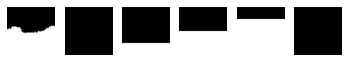

*********************
['chr12', 75000001, 75000101, 1, [65783.46, 167958.42, 161055.94, -6504.2363, -63604.188]]
0.39072314 0.0 0.25 0.5 0.75 1.0


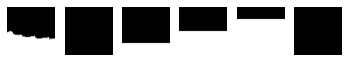

*********************
['chr12', 78000001, 78000101, 2, [33723.65, 83456.99, 163867.45, 52285.164, -34148.684]]
0.5416882 0.0 0.25 0.5 0.75 1.0


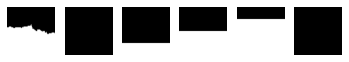

*********************
['chr12', 81000001, 81000101, 2, [48151.75, 111609.195, 174496.05, 26446.516, -43800.633]]
0.49578154 0.0 0.25 0.5 0.75 1.0


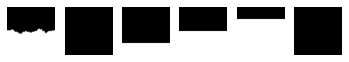

*********************
['chr12', 84000001, 84000101, 2, [29870.756, 61774.16, 150524.23, 77939.336, -25318.723]]
0.5844957 0.0 0.25 0.5 0.75 1.0


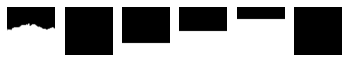

*********************
['chr12', 87000001, 87000101, 1, [70862.97, 176009.3, 156885.08, -10795.637, -68260.27]]
0.37373763 0.0 0.25 0.5 0.75 1.0


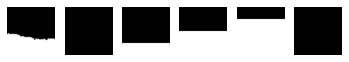

*********************
['chr12', 90000001, 90000101, 2, [54084.363, 137892.5, 163458.27, 10039.685, -56546.79]]
0.44094786 0.0 0.25 0.5 0.75 1.0


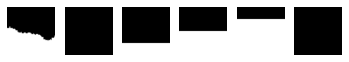

*********************
['chr12', 93000001, 93000101, 2, [26666.041, 52903.55, 140107.08, 78646.5, -24863.092]]
0.59519494 0.0 0.25 0.5 0.75 1.0


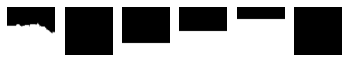

*********************
['chr12', 96000001, 96000101, 2, [39159.598, 82224.88, 167267.52, 54736.773, -32508.45]]
0.5458 0.0 0.25 0.5 0.75 1.0


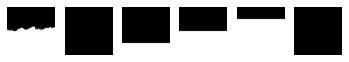

*********************
['chr12', 99000001, 99000101, 2, [44708.855, 111155.6, 175505.81, 28989.129, -42865.953]]
0.4942259 0.0 0.25 0.5 0.75 1.0


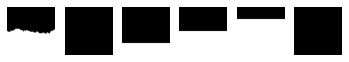

*********************
['chr12', 102000001, 102000101, 2, [48264.957, 114910.875, 177907.98, 26057.715, -42301.695]]
0.49126664 0.0 0.25 0.5 0.75 1.0


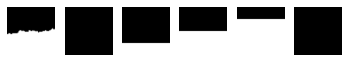

*********************
['chr12', 105000001, 105000101, 2, [30528.252, 58130.793, 147038.06, 81190.9, -23473.525]]
0.5903686 0.0 0.25 0.5 0.75 1.0


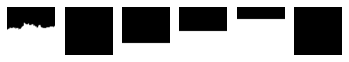

*********************
['chr12', 108000001, 108000101, 2, [13143.447, 31833.229, 115861.15, 97506.336, -10506.971]]
0.63261175 0.0 0.25 0.5 0.75 1.0


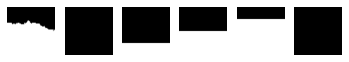

*********************
['chr12', 111000001, 111000101, 2, [39802.133, 98392.24, 167196.48, 33566.24, -41682.863]]
0.5088847 0.0 0.25 0.5 0.75 1.0


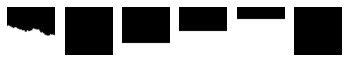

*********************
['chr12', 114000001, 114000101, 2, [52597.098, 131214.08, 179069.02, 10432.564, -49347.766]]
0.46057647 0.0 0.25 0.5 0.75 1.0


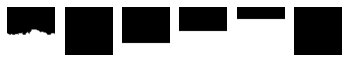

*********************
['chr12', 117000001, 117000101, 2, [26231.855, 50928.375, 141431.72, 76740.516, -17863.559]]
0.5910404 0.0 0.25 0.5 0.75 1.0


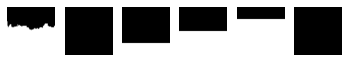

*********************
['chr12', 120000001, 120000101, 2, [45809.695, 105760.53, 170854.89, 33080.75, -40338.637]]
0.50453377 0.0 0.25 0.5 0.75 1.0


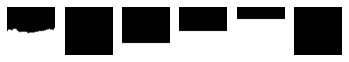

*********************
['chr12', 123000001, 123000101, 3, [-62177.777, -54706.87, 584.30865, 127616.44, 77420.984]]
0.79858863 0.0 0.25 0.5 0.75 1.0


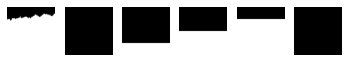

*********************
['chr12', 126000001, 126000101, 2, [55857.297, 142987.45, 179028.02, 4086.9727, -51929.094]]
0.4396 0.0 0.25 0.5 0.75 1.0


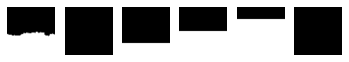

*********************
['chr12', 129000001, 129000101, 2, [23656.014, 37744.57, 121293.56, 97369.26, -7963.1274]]
0.62467605 0.0 0.25 0.5 0.75 1.0


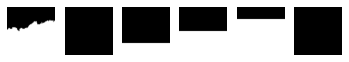

*********************
['chr12', 132000001, 132000101, 2, [43838.035, 101654.83, 174983.02, 31629.96, -43525.434]]
0.50875646 0.0 0.25 0.5 0.75 1.0
cns.chr12.txt is done
['chr13', 1, 101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


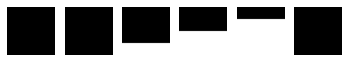

*********************
['chr13', 3000001, 3000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


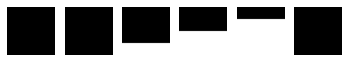

*********************
['chr13', 6000001, 6000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


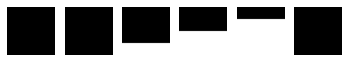

*********************
['chr13', 9000001, 9000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


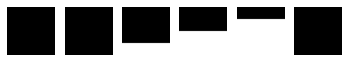

*********************
['chr13', 12000001, 12000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


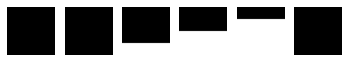

*********************
['chr13', 15000001, 15000101, 0, [178882.36, 121838.05, 46942.055, -35813.387, -169097.0]]
0.0 0.0 0.25 0.5 0.75 1.0


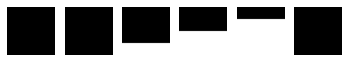

*********************
['chr13', 18000001, 18000101, 1, [109151.82, 165813.25, 117111.77, -14658.916, -105308.71]]
0.23371138 0.0 0.25 0.5 0.75 1.0


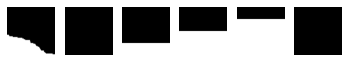

*********************
['chr13', 21000001, 21000101, 2, [43586.2, 90562.92, 161496.66, 45124.95, -33442.285]]
0.5289062 0.0 0.25 0.5 0.75 1.0


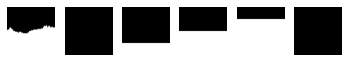

*********************


In [ ]:
encoder = load_model('cnvbot_encoder.h5')
decoder = load_model('cnvbot_decoder.h5')


chr2cov = chr2coverage('chr_coverage.tsv')
y_max =get_y_average(chr2cov)


# the images must go into the encoder as 100x100x1
image_side_size=100

# make 100 references of each coverarge [0, 25, 50, 75 , 100]
n_references=1
cn0_references =  list(map(lambda coverage :  make_reference_image_from_coverage(coverage,image_side_size), [0]*n_references   ))
cn1_references =  list(map(lambda coverage :  make_reference_image_from_coverage(coverage,image_side_size), [25]*n_references   ))
cn2_references =  list(map(lambda coverage :  make_reference_image_from_coverage(coverage,image_side_size), [50]*n_references   ))
cn3_references =  list(map(lambda coverage :  make_reference_image_from_coverage(coverage,image_side_size), [75]*n_references   ))
cn4_references =  list(map(lambda coverage :  make_reference_image_from_coverage(coverage,image_side_size), [100]*n_references   ))

cn0_references_embeddings = list( map( lambda reference: encoder(reference.reshape( (1,image_side_size,image_side_size,1)  )), cn0_references))
cn1_references_embeddings = list( map( lambda reference: encoder(reference.reshape( (1,image_side_size,image_side_size,1)  )), cn1_references))
cn2_references_embeddings = list( map( lambda reference: encoder(reference.reshape( (1,image_side_size,image_side_size,1)  )), cn2_references))
cn3_references_embeddings = list( map( lambda reference: encoder(reference.reshape( (1,image_side_size,image_side_size,1)  )), cn3_references))
cn4_references_embeddings = list( map( lambda reference: encoder(reference.reshape( (1,image_side_size,image_side_size,1)  )), cn4_references))


#for i,r in enumerate(references):
#  plt.subplot(1,5,i+1)
#  #plt.axis('off')
#  plt.imshow(r.reshape((image_size,image_size)),cmap='gray')
#plt.show()
#
# this actually coverage x 2 used to set the y axis max value in the reference images



chrs = list(map ( lambda c: 'chr'+c, [ str(i) for i in range(1,23)] + ['X','Y']))
chrs = ['chr11','chr12','chr13','chr14']

for chr in chrs:

  #y_max=int(float(chr2cov[chr])*2)
  
  #references = list(map( lambda x: np.asarray(x)), references   )
  #cn0_embedding,cn1_embedding,cn2_embedding,cn3_embedding,cn4_embedding = references
  #print(references.shape)
  #cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding = list( map( lambda reference: encoder(reference.reshape( (1,100,100,1)  )), references))
  #dec0,dec1,dec2,dec3,dec4 = decode_references(cn0_embedding,cn1_embedding,cn2_embedding,cn3_embedding,cn4_embedding,decoder,image_size)
  
  
  #y_max=int(float(chr2cov[chr])*2)
  #cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding =  process_reference_files(chr,encoder,image_size)
  #dec0,dec1,dec2,dec3,dec4 = decode_references(cn0_embedding,cn1_embedding,cn2_embedding,cn3_embedding,cn4_embedding,decoder,image_size)
  #cn0,cn1,cn2,cn3,cn4= list( map(lambda png: image2array(png,image_size), [chr+'_cn0.png',chr+'_cn1.png',chr+'_cn2.png',chr+'_cn3.png',chr+'_cn4.png']) )

  output_file_name = 'cns.'+ chr +'.txt' 
  f = open(output_file_name,'w')
  coverage_file='coverage.' + chr + '.txt.gz'

  h = gzip.open(coverage_file, 'rt')

  reader = csv.reader(h,delimiter='\t')
  x_max=image_side_size # my suggested 100 bases

  batch_size=30000
  #batch_size=1

  batch_full=False
  batch=list()
  batch_start_positions=list()

  while True:
    try:
      image, image_start = make_image_from_coverage(reader,x_max,y_max)

  #break'''


      batch.append(image)
      batch_start_positions.append(image_start)

      if len(batch) == batch_size:
        batch_start=batch_start_positions[0]
        estimations = process_batch_of_images(encoder,batch, f, batch_start, x_max , cn0_references_embeddings, cn1_references_embeddings,cn2_references_embeddings, cn3_references_embeddings, cn4_references_embeddings)
   
        
        #estimations = process_batch_of_images(encoder,cn0_embedding, cn1_embedding, cn2_embedding, cn3_embedding, cn4_embedding, batch, f,batch_start, x_max)
        #encoder.predict(batch[0]))
        print(estimations[0])
        print(np.mean(batch[0]),np.mean(cn0_references),np.mean(cn1_references),np.mean(cn2_references),np.mean(cn3_references),np.mean(cn4_references))
        #print(np.mean(batch[0]),np.mean(cn0),np.mean(cn1),np.mean(cn2),np.mean(cn3),np.mean(cn4))
        plt.subplot(1,6,1)
        plt.axis('off')
        plt.imshow(batch[0].reshape((x_max,x_max)),cmap='gray')
        plt.subplot(1,6,2)
        plt.axis('off')
        plt.imshow(cn0_references[0].reshape((x_max,x_max)),cmap='gray')
        plt.subplot(1,6,3)
        plt.axis('off')
        plt.imshow(cn1_references[0].reshape((x_max,x_max)),cmap='gray')
        plt.subplot(1,6,4)
        plt.axis('off')
        plt.imshow(cn2_references[0].reshape((x_max,x_max)),cmap='gray')
        plt.subplot(1,6,5)
        plt.axis('off')
        plt.imshow(cn3_references[0].reshape((x_max,x_max)),cmap='gray')
        plt.subplot(1,6,6)
        plt.axis('off')
        plt.imshow(cn4_references[0].reshape((x_max,x_max)),cmap='gray')
        plt.show()
        print("*********************")
        
        
        
        
        batch_full=False  
        batch=list()
        batch_start_positions=list()

    except StopIteration as ex:
      batch_start=batch_start_positions[0]
      estimations = process_batch_of_images(encoder,batch, f, batch_start, x_max , cn0_references_embeddings, cn1_references_embeddings,cn2_references_embeddings, cn3_references_embeddings, cn4_references_embeddings)
      print(estimations[0])
      print(np.mean(batch[0]),np.mean(cn0_references),np.mean(cn1_references),np.mean(cn2_references),np.mean(cn3_references),np.mean(cn4_references))
      break

  f.close()
  h.close()
  print('{} is done'.format(output_file_name))

  #if os.path.exists(coverage_file):
  #  os.remove(coverage_file)


In [ ]:
!awk '{print $4}' cns.chr10.txt | sort | uniq -c 

  18117 0
 180953 1
1083685 2
  48277 3
   6942 4


In [ ]:
from google.colab import drive
 
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!cp cns.chr10.txt /content/drive/MyDrive/cns.chr10.ymax_itslef.txt